In [79]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing , cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime
%matplotlib inline

In [80]:
style.use('ggplot')

In [81]:
madinet_Nasr_Housing=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Medinet Nasr Housing.csv",index_col=1)

In [82]:
madinet_Nasr_Housing.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS65571C019,103941,2582112.50,119,24.39,25.05,24.02,24.84
1/3/2013 0:00,EGS65571C019,232703,5961554.06,167,24.70,26.00,24.70,25.62
1/6/2013 0:00,EGS65571C019,76886,1956936.75,117,25.30,25.85,25.07,25.45
1/8/2013 0:00,EGS65571C019,64687,1620033.52,91,25.16,25.16,24.87,25.04
1/9/2013 0:00,EGS65571C019,49786,1242881.47,62,25.04,25.19,24.66,24.96


In [83]:
madinet_Nasr_Housing['HL_PCT']=(madinet_Nasr_Housing['HIGH_PRICE']-madinet_Nasr_Housing['LOW_PRICE'])/madinet_Nasr_Housing['CLOSE_PRICE']*100.0
madinet_Nasr_Housing['PCT_change']=(madinet_Nasr_Housing['CLOSE_PRICE']-madinet_Nasr_Housing['OPEN_PRICE'])/madinet_Nasr_Housing['OPEN_PRICE']*100.0
madinet_Nasr_Housing.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,HL_PCT,PCT_change
TRADE_DATE,,,,,,,,,,
1/2/2013 0:00,EGS65571C019,103941,2582112.50,119,24.39,25.05,24.02,24.84,4.146538,1.845018
1/3/2013 0:00,EGS65571C019,232703,5961554.06,167,24.70,26.00,24.70,25.62,5.074161,3.724696
1/6/2013 0:00,EGS65571C019,76886,1956936.75,117,25.30,25.85,25.07,25.45,3.064833,0.592885
1/8/2013 0:00,EGS65571C019,64687,1620033.52,91,25.16,25.16,24.87,25.04,1.158147,-0.476948
1/9/2013 0:00,EGS65571C019,49786,1242881.47,62,25.04,25.19,24.66,24.96,2.123397,-0.319489


In [84]:
madinet_Nasr_Housing=madinet_Nasr_Housing[['TRADE_VOLUME','CLOSE_PRICE','HL_PCT','PCT_change']]
madinet_Nasr_Housing.head()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change
TRADE_DATE,,,,
1/2/2013 0:00,103941,24.84,4.146538,1.845018
1/3/2013 0:00,232703,25.62,5.074161,3.724696
1/6/2013 0:00,76886,25.45,3.064833,0.592885
1/8/2013 0:00,64687,25.04,1.158147,-0.476948
1/9/2013 0:00,49786,24.96,2.123397,-0.319489


In [85]:
madinet_Nasr_Housing.fillna(value=-999999,inplace=True)
forecast_out=int(math.ceil(0.041*len(madinet_Nasr_Housing)))
forecast_out

50

In [86]:
madinet_Nasr_Housing['Label']=madinet_Nasr_Housing['CLOSE_PRICE'].shift(-forecast_out)
madinet_Nasr_Housing.tail()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change,Label
TRADE_DATE,,,,,
12/25/2017 0:00,3298857,10.92,2.289377,1.204819,NaN
12/26/2017 0:00,464501,10.87,1.655934,-0.183655,NaN
12/27/2017 0:00,3037790,10.78,2.597403,-0.645161,NaN
12/28/2017 0:00,666757,10.72,1.679104,-0.279070,NaN
12/31/2017 0:00,1328205,10.58,2.268431,-1.121495,NaN


In [87]:
X=np.array(madinet_Nasr_Housing.drop(['Label'],1))
X=preprocessing.scale(X)

In [88]:
X_lately=X[-forecast_out:]
X=X[:-forecast_out]

In [89]:
madinet_Nasr_Housing.dropna(inplace=True)
len(madinet_Nasr_Housing)

1169

In [90]:
madinet_Nasr_Housing.head()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change,Label
TRADE_DATE,,,,,
1/2/2013 0:00,103941,24.84,4.146538,1.845018,21.00
1/3/2013 0:00,232703,25.62,5.074161,3.724696,20.47
1/6/2013 0:00,76886,25.45,3.064833,0.592885,20.56
1/8/2013 0:00,64687,25.04,1.158147,-0.476948,20.81
1/9/2013 0:00,49786,24.96,2.123397,-0.319489,21.00


In [91]:
len(X)

1169

In [92]:
y=np.array(madinet_Nasr_Housing['Label'])
len(y)

1169

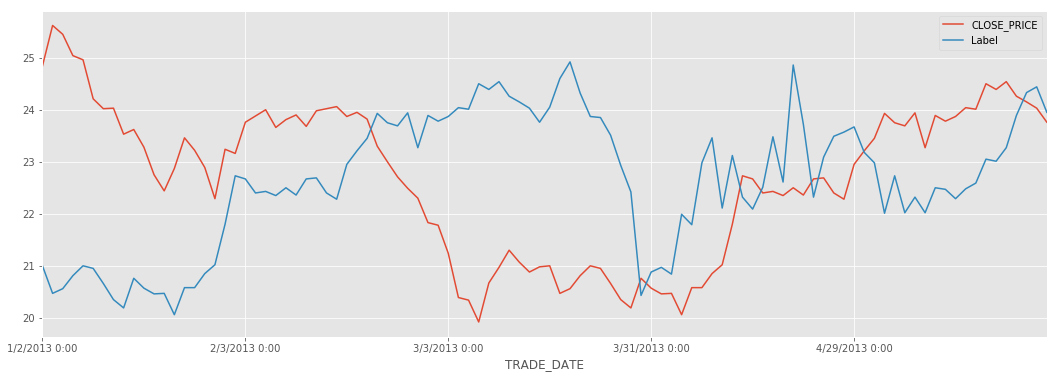

In [93]:
tmp=madinet_Nasr_Housing[['CLOSE_PRICE','Label']]
tmp[:100].plot(figsize=(18,6))
plt.show()

In [94]:
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [95]:
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
forecast_set=clf.predict(X_lately)
y_pred_lr=clf.predict(X_test)
len(X_lately),len(X_test),len(y_test),len(X_train),len(forecast_set)

(50, 234, 234, 935, 50)

In [97]:
madinet_Nasr_Housing['Forecast']=np.nan
madinet_Nasr_Housing.tail()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change,Label,Forecast
TRADE_DATE,,,,,,
10/15/2017 0:00,940893,10.43,2.588686,-0.666667,10.92,NaN
10/16/2017 0:00,2493386,10.12,5.237154,-1.842871,10.87,NaN
10/17/2017 0:00,1431902,10.15,3.645320,0.000000,10.78,NaN
10/18/2017 0:00,3272549,10.33,3.291384,0.000000,10.72,NaN
10/19/2017 0:00,3566792,10.37,2.989392,0.581959,10.58,NaN


In [98]:
last_date=madinet_Nasr_Housing.iloc[-1].name
last_date

'10/19/2017 0:00'

In [111]:
one_day=86400 #minutes
ts = datetime.datetime.now().timestamp()
last_day=ts
next_day=last_day+one_day
ts

1517903272.955963

In [112]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_day)
    next_day+=86400
    madinet_Nasr_Housing.loc[next_date]=[np.nan for j in range(len(madinet_Nasr_Housing.columns)-1)]+[i]

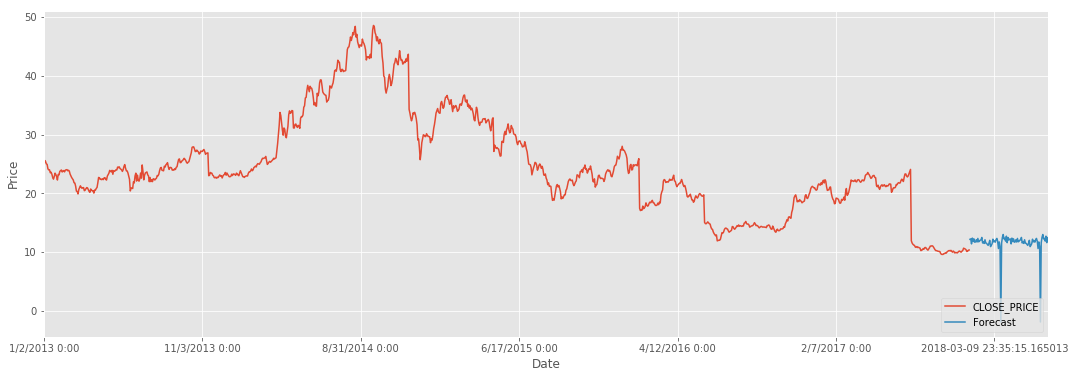

In [113]:
madinet_Nasr_Housing[['CLOSE_PRICE','Forecast']].plot(figsize=(18,6))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

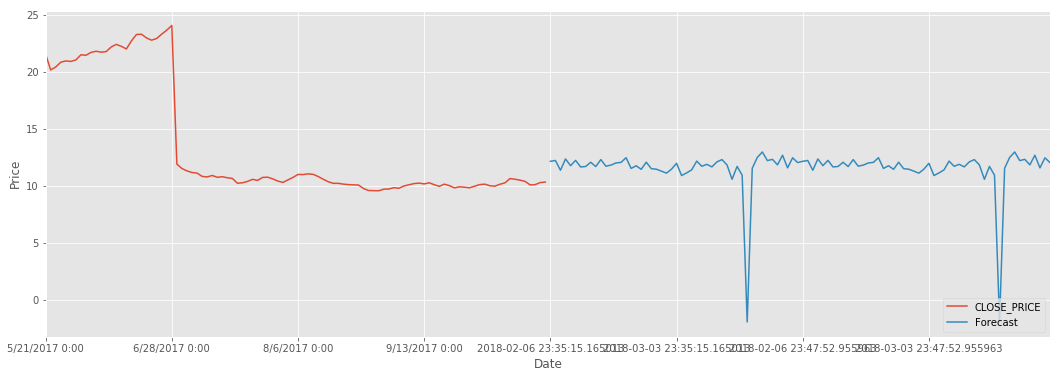

In [114]:
madinet_Nasr_Housing[['CLOSE_PRICE','Forecast']][-200:].plot(figsize=(18,6))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [106]:
accuracy=clf.score(X_test,y_test)
accuracy*100

66.657360487505613

In [115]:
madinet_Nasr_Housing.tail()

,TRADE_VOLUME,CLOSE_PRICE,HL_PCT,PCT_change,Label,Forecast
TRADE_DATE,,,,,,
2018-03-24 00:47:52.955963,NaN,NaN,NaN,NaN,NaN,11.881862
2018-03-25 00:47:52.955963,NaN,NaN,NaN,NaN,NaN,12.726340
2018-03-26 00:47:52.955963,NaN,NaN,NaN,NaN,NaN,11.617667
2018-03-27 00:47:52.955963,NaN,NaN,NaN,NaN,NaN,12.499742
2018-03-28 00:47:52.955963,NaN,NaN,NaN,NaN,NaN,12.078842
